# Final Project Job Connector Data Science and Machine Learning 
(JCDS0804 JKT)

**By: Azizur Rachman**

## Description
This project deals with the subject of Human Capital/Human Resources Attrition. The dataset is taken from kaggle under this link: https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study/. Here are the problem statement directly quoted from Kaggle as follows:


"Problem Statement
A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away"

## Import Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Dataset

Note: 4 datasets are used in this final project, they are:
1. data_dictionary
2. employee_survey_data
3. general_data
4. manager_survey_data

The data_dictionary is formatted in excel and it explains about each individual features. For this final project, only four datasets are used. Some additional datasets are also available, but the data dictionary did not define their purpose since they can be used for additional work performance analysis in the HR Field. 

In [15]:
data_dict = pd.read_excel('A:\Purwadhika\Jupyter\Final Project\Dataset\data_dictionary.xlsx')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', -1)
data_dict
# The datasets contain data dictionary which is a short explanation of every features used in some of csv's files used. 

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year or not,NaN
2,BusinessTravel,How frequently the employees travelled for business purposes in the last year,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


In [5]:
gen_data = pd.read_csv('A:\Purwadhika\Jupyter\Final Project\Dataset\general_data.csv') #Load Data from internal directory
pd.set_option('display.max_columns', None) #ensure that all columns are displayed (not truncated)
gen_data.head() #display the first five rows

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [6]:
gen_data.info() #print-out information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [7]:
def summary_table(df): #function to create an added information regarding the dataset
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes, #display datatype
                                  null = df.isna().sum(), #sum of null values
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),#how many percente null values
                                  unique = df.nunique(),  #cek for number of unique values
                                  uniqueSample = [list(df[i].sample(3).drop_duplicates()) for i in df.columns] #3 random samples
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

In [8]:
summary_table(gen_data) #apply the function to the dataset

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,Age,int64,0,0.00,43,"[31, 27, 43]",0.98
1,Attrition,object,0,0.00,2,"[Yes, No]",0.05
2,BusinessTravel,object,0,0.00,3,"[Travel_Frequently, Travel_Rarely]",0.07
3,Department,object,0,0.00,3,"[Human Resources, Sales]",0.07
4,DistanceFromHome,int64,0,0.00,29,"[5, 10]",0.66
5,Education,int64,0,0.00,5,"[5, 4, 2]",0.11
6,EducationField,object,0,0.00,6,"[Medical, Life Sciences]",0.14
7,EmployeeCount,int64,0,0.00,1,[1],0.02
8,EmployeeID,int64,0,0.00,4410,"[4167, 1872, 538]",100.00
9,Gender,object,0,0.00,2,[Male],0.05


In [16]:
emp_data = pd.read_csv('A:\Purwadhika\Jupyter\Final Project\Dataset\employee_survey_data.csv') #dataset for employee_survey_data
pd.set_option('display.max_columns', None)
emp_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [18]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
EmployeeID                 4410 non-null int64
EnvironmentSatisfaction    4385 non-null float64
JobSatisfaction            4390 non-null float64
WorkLifeBalance            4372 non-null float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [19]:
mngr_data = pd.read_csv('A:\Purwadhika\Jupyter\Final Project\Dataset\manager_survey_data.csv') #dataset for manager_survey_data
pd.set_option('display.max_columns', None)
mngr_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [20]:
mngr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
EmployeeID           4410 non-null int64
JobInvolvement       4410 non-null int64
PerformanceRating    4410 non-null int64
dtypes: int64(3)
memory usage: 103.5 KB


## Merge 3 different dataset into one
The three different dataset can be merged into one as each and every dataset has a common feature (EmployeeID). In order to merge them, we will join them two datasets at a time

In [21]:
half_data = pd.merge(gen_data,emp_data, how = 'inner') # gen_data and emp_data merged first
half_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8,4.0,1.0,3.0


In [35]:
full_data_raw = pd.merge(half_data,mngr_data, how = 'inner') 
#then the two merged datasets, we merge it again to form into one full dataset

In [25]:
full_data_raw.to_csv('Dataset/full_data_raw.csv', index = False) #export to csv format one full dataset raw

In [36]:
full_data_raw.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [26]:
full_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [30]:
full_data_raw.shape #as it is stated .info() method, the data contains 4410 rows and 29 columns(features)

(4410, 29)

In [34]:
summary_table(full_data_raw) #function to show additional information regarding each features

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,Age,int64,0,0.00,43,"[47, 37, 28]",0.98
1,Attrition,object,0,0.00,2,[No],0.05
2,BusinessTravel,object,0,0.00,3,[Travel_Rarely],0.07
3,Department,object,0,0.00,3,"[Sales, Research & Development]",0.07
4,DistanceFromHome,int64,0,0.00,29,"[1, 18, 5]",0.66
5,Education,int64,0,0.00,5,"[2, 3, 5]",0.11
6,EducationField,object,0,0.00,6,"[Technical Degree, Medical, Life Sciences]",0.14
7,EmployeeCount,int64,0,0.00,1,[1],0.02
8,EmployeeID,int64,0,0.00,4410,"[3279, 4191, 607]",100.00
9,Gender,object,0,0.00,2,[Male],0.05


## Check any missing values

In [58]:
null_series = full_data_raw.isna().sum() #check any missing value/Not a number (NaN)
null_series

Age                        0 
Attrition                  0 
BusinessTravel             0 
Department                 0 
DistanceFromHome           0 
Education                  0 
EducationField             0 
EmployeeCount              0 
EmployeeID                 0 
Gender                     0 
JobLevel                   0 
JobRole                    0 
MaritalStatus              0 
MonthlyIncome              0 
NumCompaniesWorked         19
Over18                     0 
PercentSalaryHike          0 
StandardHours              0 
StockOptionLevel           0 
TotalWorkingYears          9 
TrainingTimesLastYear      0 
YearsAtCompany             0 
YearsSinceLastPromotion    0 
YearsWithCurrManager       0 
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement             0 
PerformanceRating          0 
dtype: int64

There are 3 features containing missing values/NaN, they are:
'NumCompaniesWorked', 'EnvironmentSatisfaction', 'JobSatisfaction' and 'WorkLifeBalance' 

In [46]:
null_data = full_data_raw[full_data_raw.isna().any(axis=1)] # show the dataframe that has missing values
null_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
11,36,No,Travel_Rarely,Research & Development,28,1,Life Sciences,1,12,Male,1,Laboratory Technician,Married,33770,0.0,Y,12,8,2,16.0,2,15,10,11,NaN,4.0,3.0,3,3
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,1,24,Male,1,Manufacturing Director,Married,89260,1.0,Y,14,8,0,NaN,4,20,11,6,2.0,3.0,3.0,1,3
40,36,No,Travel_Frequently,Research & Development,8,3,Other,1,41,Female,3,Sales Executive,Married,69620,4.0,Y,12,8,2,4.0,2,1,0,0,3.0,NaN,3.0,2,3
84,31,No,Travel_Rarely,Research & Development,6,3,Medical,1,85,Female,3,Manager,Single,81030,1.0,Y,15,8,1,11.0,5,11,4,10,3.0,4.0,NaN,3,3
111,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,112,Male,4,Human Resources,Single,28670,0.0,Y,24,8,0,3.0,5,2,2,2,NaN,2.0,3.0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,45,No,Travel_Rarely,Sales,1,4,Technical Degree,1,4306,Male,1,Research Scientist,Divorced,25800,8.0,Y,17,8,3,20.0,3,17,0,15,2.0,2.0,NaN,3,3
4332,31,No,Travel_Rarely,Sales,2,5,Life Sciences,1,4333,Male,2,Sales Representative,Married,27280,8.0,Y,11,8,0,7.0,3,4,0,2,NaN,4.0,3.0,4,3
4345,43,No,Non-Travel,Research & Development,6,2,Medical,1,4346,Male,1,Healthcare Representative,Divorced,20280,4.0,Y,20,8,1,7.0,2,5,2,2,4.0,NaN,4.0,2,4
4395,40,No,Travel_Rarely,Research & Development,2,3,Life Sciences,1,4396,Male,1,Manufacturing Director,Divorced,27180,NaN,Y,14,8,1,9.0,4,9,4,7,1.0,4.0,3.0,2,3


In [59]:
print(null_series[null_series>0]) #shortened summary of features containing null values

NumCompaniesWorked         19
TotalWorkingYears          9 
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64


In [54]:
full_data_raw.describe().transpose() #describe for numerical features

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [52]:
full_data_raw.describe(exclude = 'number').transpose() #describe for categorical values

,count,unique,top,freq
Attrition,4410,2,No,3699
BusinessTravel,4410,3,Travel_Rarely,3129
Department,4410,3,Research & Development,2883
EducationField,4410,6,Life Sciences,1818
Gender,4410,2,Male,2646
JobRole,4410,9,Sales Executive,978
MaritalStatus,4410,3,Married,2019
Over18,4410,1,Y,4410


In [60]:
full_data_raw.columns.to_series().groupby(full_data_raw.dtypes).groups

{dtype('int64'): Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
        'JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'StandardHours',
        'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobInvolvement',
        'PerformanceRating'],
       dtype='object'),
 dtype('float64'): Index(['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction',
        'JobSatisfaction', 'WorkLifeBalance'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18'],
       dtype='object')}

In [61]:
full_data_raw['NumCompaniesWorked'].fillna(value = full_data_raw['NumCompaniesWorked'].median(), inplace = True)
full_data_raw['TotalWorkingYears'].fillna(value = full_data_raw['TotalWorkingYears'].median(), inplace = True)
full_data_raw['EnvironmentSatisfaction'].fillna(value = full_data_raw['EnvironmentSatisfaction'].mode()[0], inplace = True)
full_data_raw['JobSatisfaction'].fillna(value = full_data_raw['JobSatisfaction'].mode()[0], inplace = True)
full_data_raw['WorkLifeBalance'].fillna(value = full_data_raw['WorkLifeBalance'].mode()[0], inplace = True)


In [63]:
full_data_raw.isna().sum() #cek after NaN values being replaced

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

let us group different features to their corresponding types of data

In [93]:
float_features_to_int = list(full_data_raw.select_dtypes(include = [float]))
full_data_raw[float_features_to_int] = full_data_raw[float_features_to_int].astype('int')
#change float data to int data as there are no decimal points 

In [83]:
#let's try to rearrange the columns so that it is much easier to evaluate
full_data_raw = full_data_raw[['EmployeeID','Gender','Age','MaritalStatus',
                                   'DistanceFromHome','EducationField','Education','Department',
                                   'JobLevel','JobRole','StandardHours','YearsAtCompany','TotalWorkingYears',
                                   'NumCompaniesWorked','MonthlyIncome','PercentSalaryHike','BusinessTravel',
                                   'TrainingTimesLastYear','YearsSinceLastPromotion', 'YearsWithCurrManager',
                                   'JobInvolvement','EnvironmentSatisfaction','JobSatisfaction', 'WorkLifeBalance',
                                    'PerformanceRating','StockOptionLevel','EmployeeCount','Over18','Attrition']]

In [94]:
categorical_features = list(full_data_clean.select_dtypes(include = [object]))
print(len(categorical_features))

numerical_features = list(full_data_clean.select_dtypes(exclude = [object])) 
#check again for the number of datatypes other than object
print(len(numerical_features))

8
21


In [96]:
full_data_raw.info() #check the data type after conversion

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
Age                        4410 non-null int64
MaritalStatus              4410 non-null object
DistanceFromHome           4410 non-null int64
EducationField             4410 non-null object
Education                  4410 non-null int64
Department                 4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
StandardHours              4410 non-null int64
YearsAtCompany             4410 non-null int64
TotalWorkingYears          4410 non-null int32
NumCompaniesWorked         4410 non-null int32
MonthlyIncome              4410 non-null int64
PercentSalaryHike          4410 non-null int64
BusinessTravel             4410 non-null object
TrainingTimesLastYear      4410 non-null int64
YearsSinceLastPromotion    4410 non-null 

In [97]:
full_data_raw.to_csv('Dataset/full_data_clean.csv', index = False)

## EDA

## Load Dataset (clean)

In [98]:
full_data_clean = pd.read_csv('Dataset/full_data_clean.csv')

In [99]:
categorical_features = list(full_data_clean.select_dtypes(include = [object]))
print(len(categorical_features))

numerical_features = list(full_data_clean.select_dtypes(exclude = [object]))
print(len(numerical_features))

# target_features = categorical_features.remove('Attrition')

8
21


['Gender',
 'MaritalStatus',
 'EducationField',
 'Department',
 'JobRole',
 'BusinessTravel',
 'Over18',
 'Attrition']

In [100]:
full_data_clean.columns

Index(['EmployeeID', 'Gender', 'Age', 'MaritalStatus', 'DistanceFromHome',
       'EducationField', 'Education', 'Department', 'JobLevel', 'JobRole',
       'StandardHours', 'YearsAtCompany', 'TotalWorkingYears',
       'NumCompaniesWorked', 'MonthlyIncome', 'PercentSalaryHike',
       'BusinessTravel', 'TrainingTimesLastYear', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'PerformanceRating',
       'StockOptionLevel', 'EmployeeCount', 'Over18', 'Attrition'],
      dtype='object')

In [101]:
full_data_clean.head()

,EmployeeID,Gender,Age,MaritalStatus,DistanceFromHome,EducationField,Education,Department,JobLevel,JobRole,StandardHours,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,MonthlyIncome,PercentSalaryHike,BusinessTravel,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,PerformanceRating,StockOptionLevel,EmployeeCount,Over18,Attrition
0,1,Female,51,Married,6,Life Sciences,2,Sales,1,Healthcare Representative,8,1,1,1,131160,11,Travel_Rarely,6,0,0,3,3,4,2,3,0,1,Y,No
1,2,Female,31,Single,10,Life Sciences,1,Research & Development,1,Research Scientist,8,5,6,0,41890,23,Travel_Frequently,3,1,4,2,3,2,4,4,1,1,Y,Yes
2,3,Male,32,Married,17,Other,4,Research & Development,4,Sales Executive,8,5,5,1,193280,15,Travel_Frequently,2,0,3,3,2,2,1,3,3,1,Y,No
3,4,Male,38,Married,2,Life Sciences,5,Research & Development,3,Human Resources,8,8,13,3,83210,11,Non-Travel,5,7,5,2,4,4,3,3,3,1,Y,No
4,5,Male,32,Single,10,Medical,1,Research & Development,1,Sales Executive,8,6,9,4,23420,12,Travel_Rarely,2,0,4,3,4,1,3,3,2,1,Y,No


In [71]:
full_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4410 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

C:\Users\Azizur Rachman\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Azizur Rachman\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Azizur Rachman\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Azizur Rachman\Anaconda3\lib\

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3C8627088>,
      dtype=object)

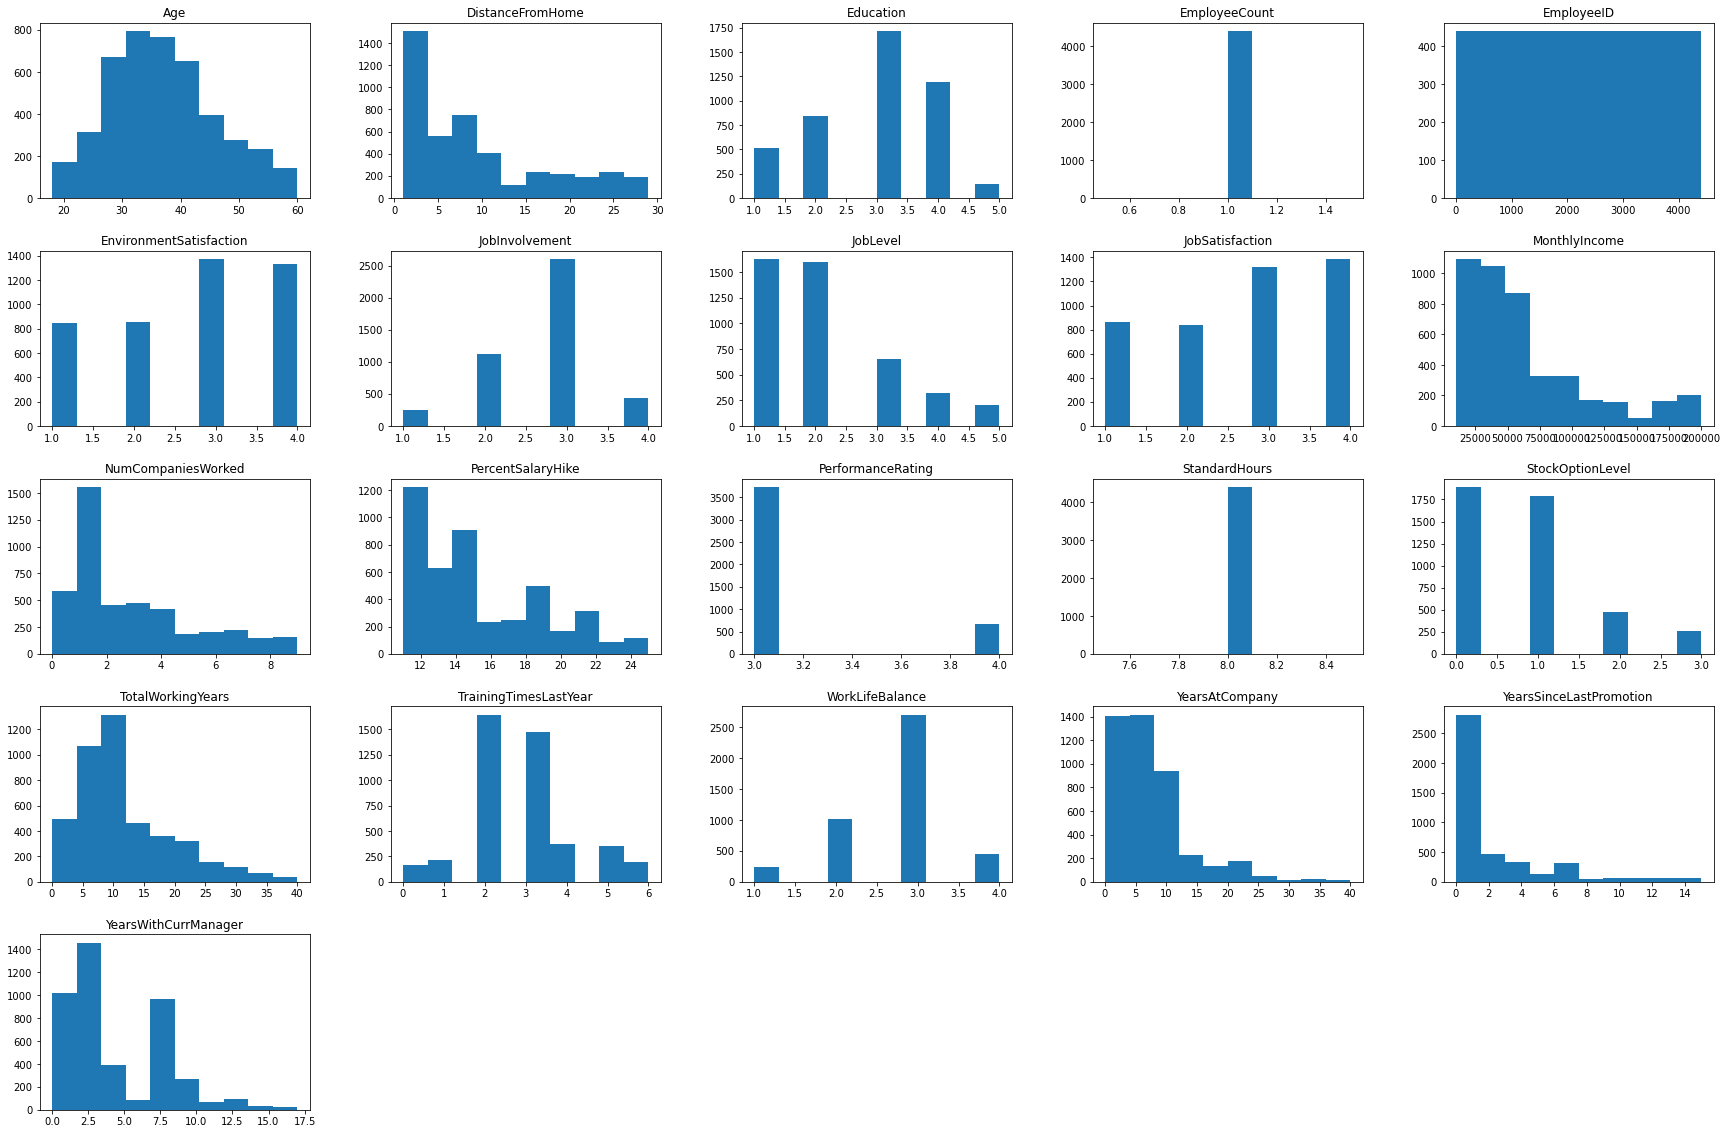

In [72]:
full_data_clean.hist(figsize=(30,20),grid = False) 
#let's plot each individual numerical features based on their frequency of each.

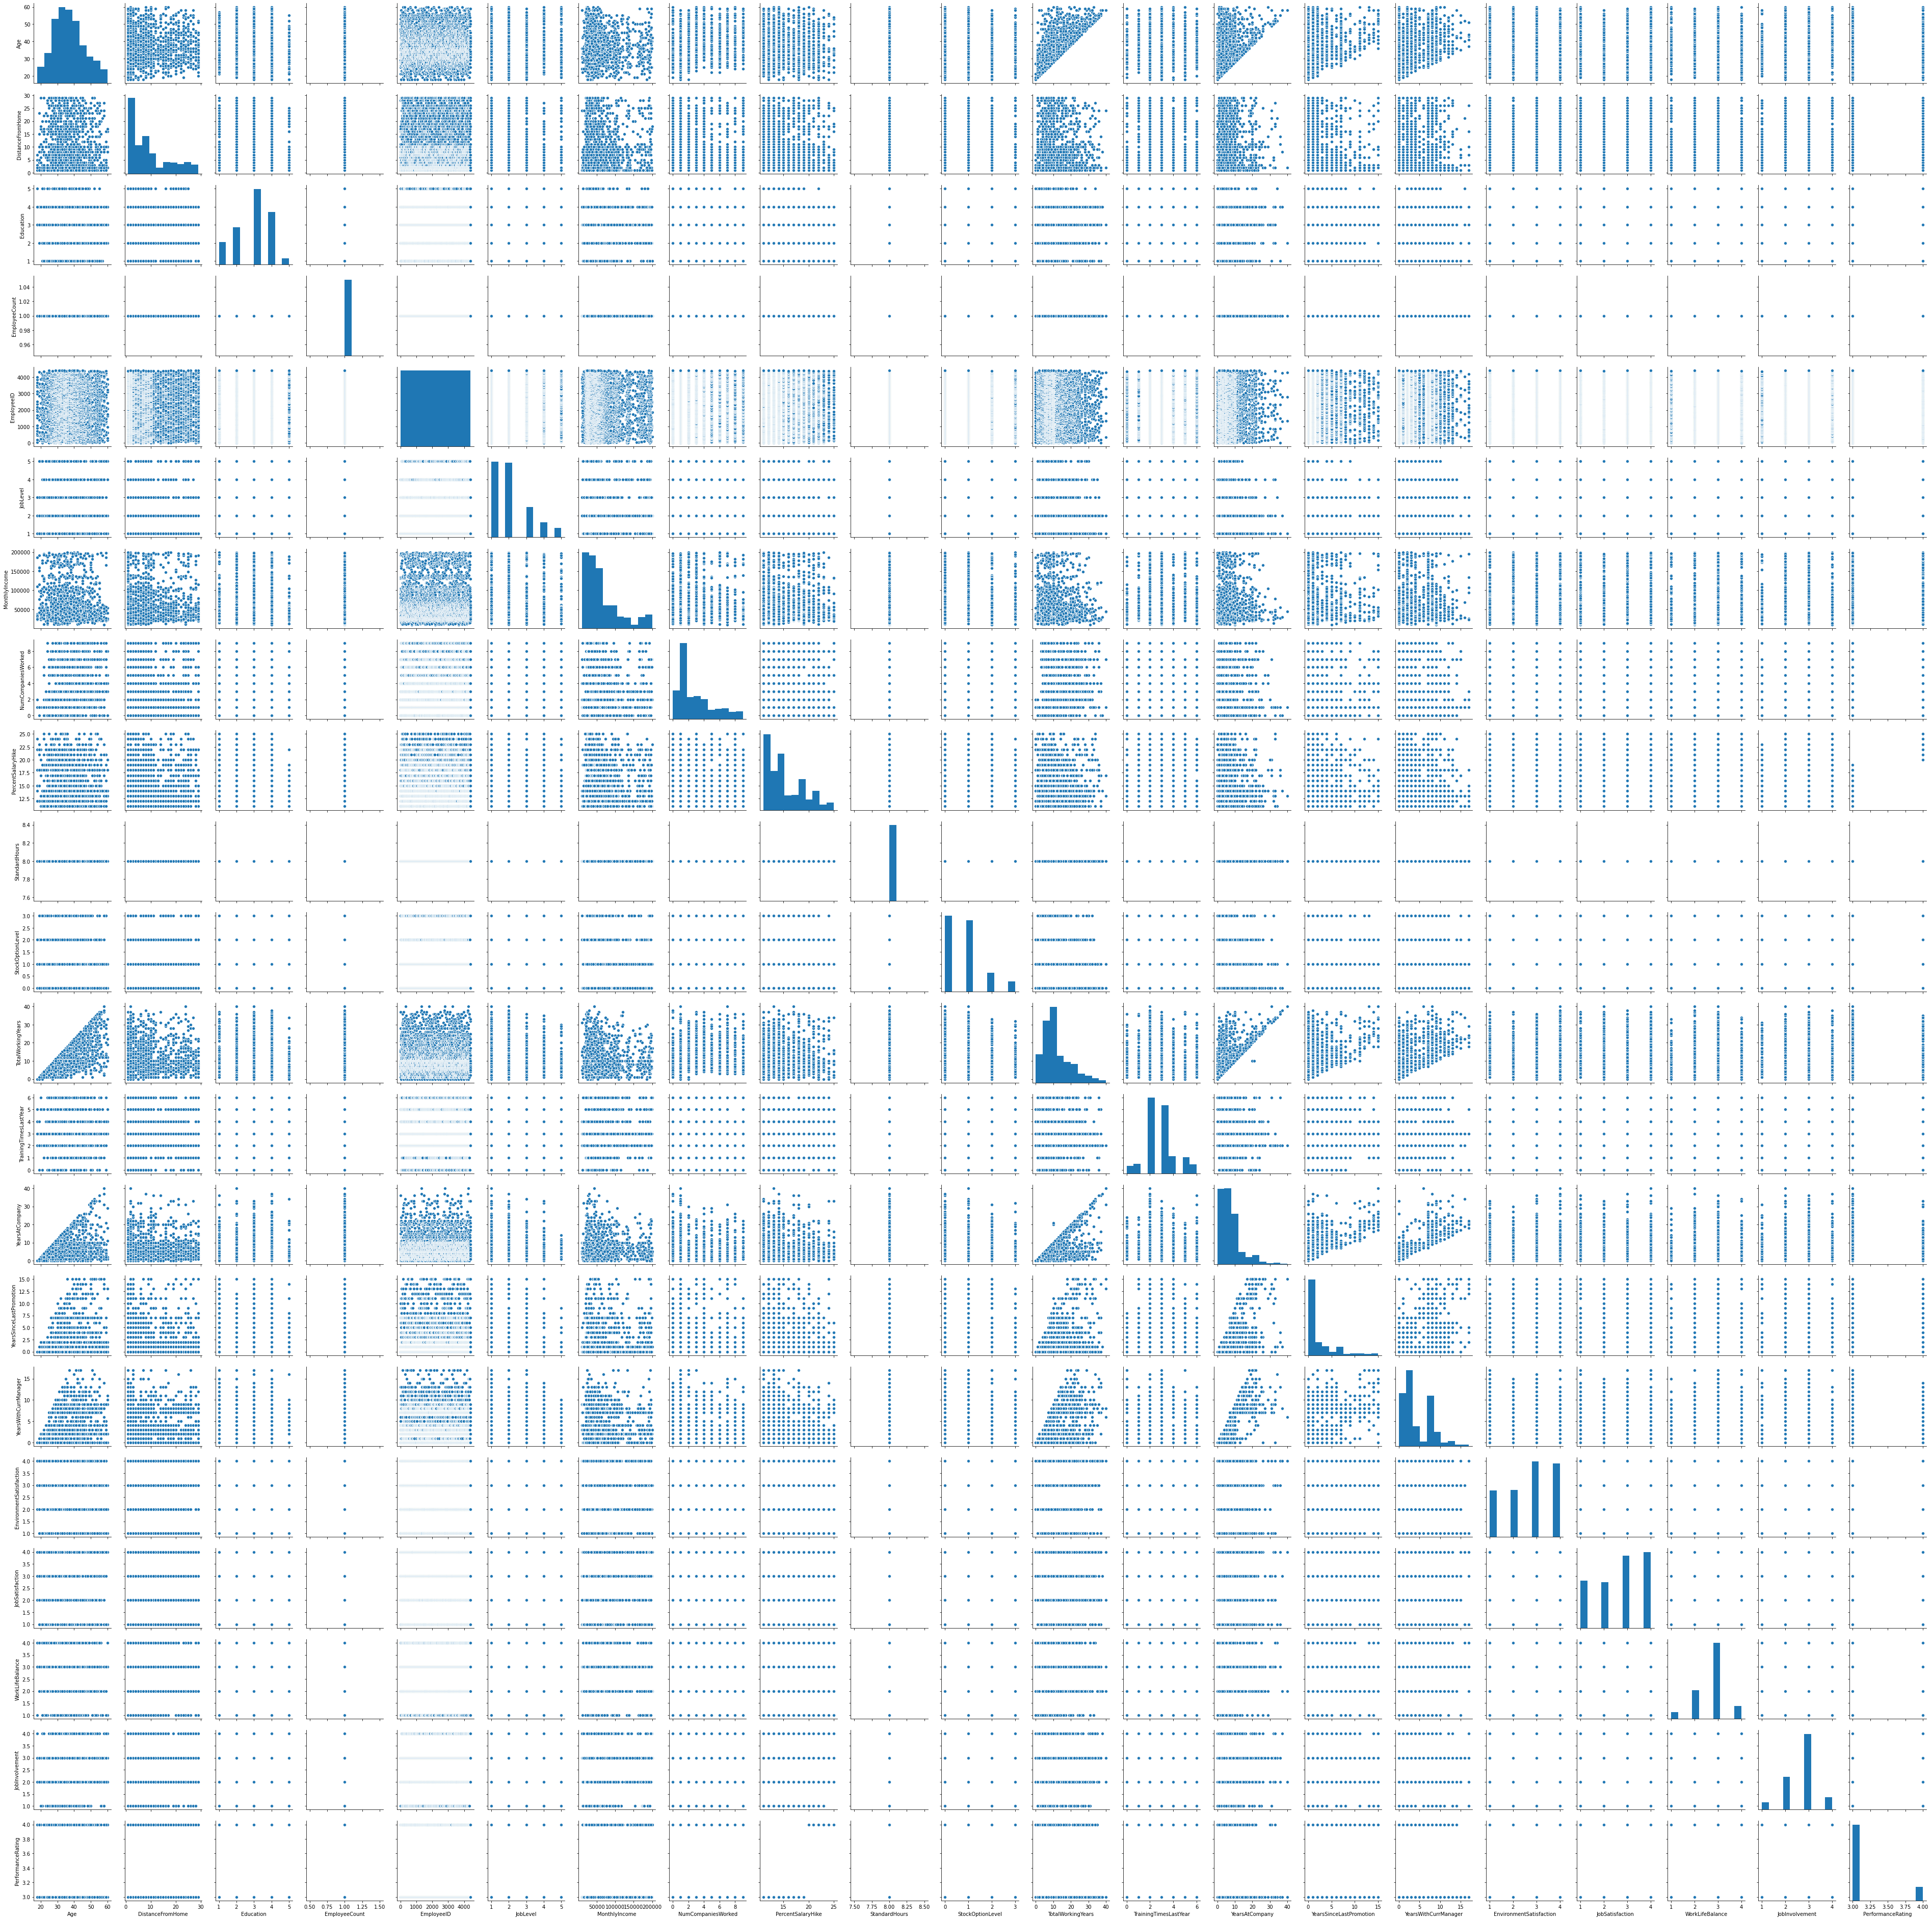

In [76]:
sns.pairplot(full_data_clean[numerical_features])

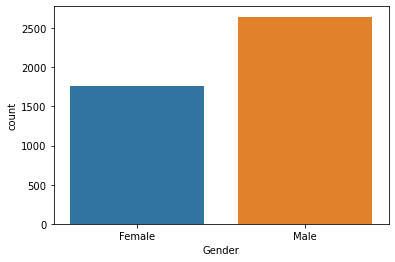

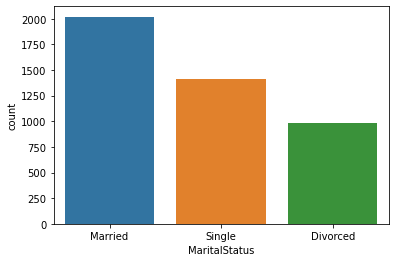

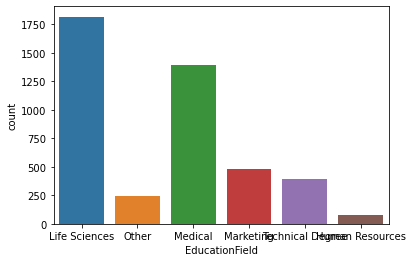

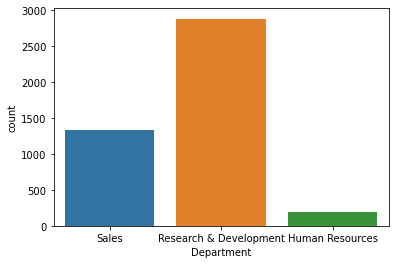

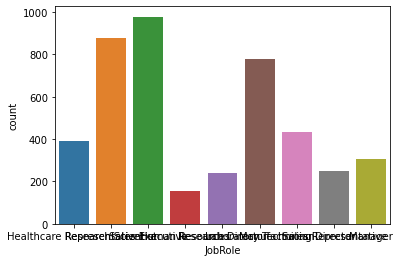

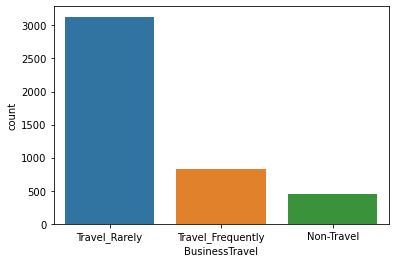

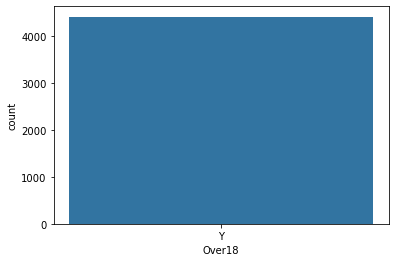

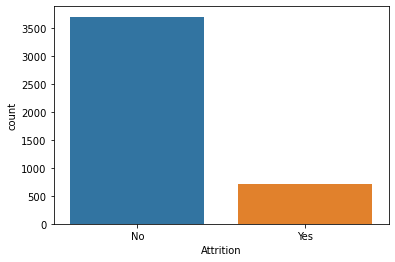

In [108]:
for features in categorical_features:
    figsize=(100,100)
    sns.countplot(full_data_clean[features])
    plt.show()

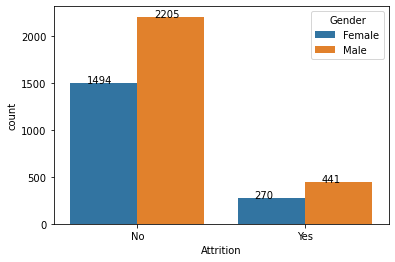

In [136]:
ax = sns.countplot(x="Attrition", hue="Gender", data=full_data_clean)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

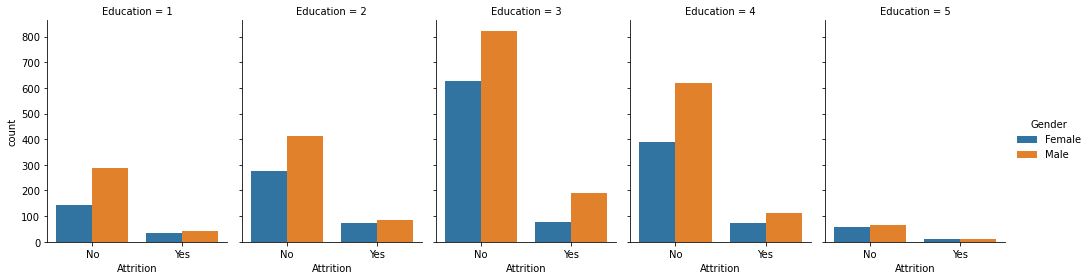

In [113]:
g = sns.catplot(x="Attrition", hue="Gender", col="Education",
                data=full_data_clean, kind="count",
                height=4, aspect=.7);

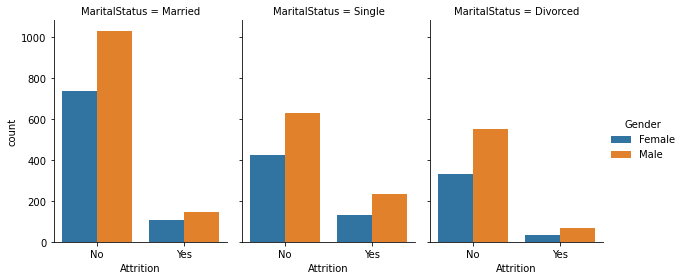

In [118]:
g1 = sns.catplot(x="Attrition", hue="Gender", col="MaritalStatus",
                data=full_data_clean, kind="count",
                height=4, aspect=.7);

AttributeError: 'FacetGrid' object has no attribute 'patches'

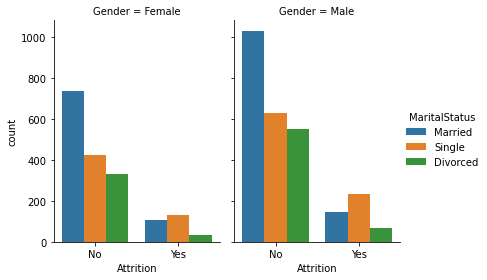

In [127]:
g2 = sns.catplot(x="Attrition", hue="MaritalStatus", col="Gender",
                data=full_data_clean, kind="count",
                height=4, aspect=.7);

for p in g2.patches:
        g2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))


# for p in g2.patches:
#     g2.annotate((p.get_height()),(p.get_x()+0.28 , p.get_height()+100))

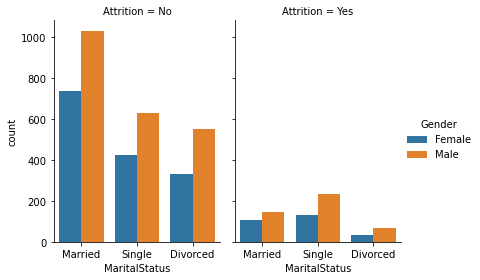

In [120]:
g3 = sns.catplot(x="MaritalStatus", hue="Gender", col="Attrition",
                data=full_data_clean, kind="count",
                height=4, aspect=.7);

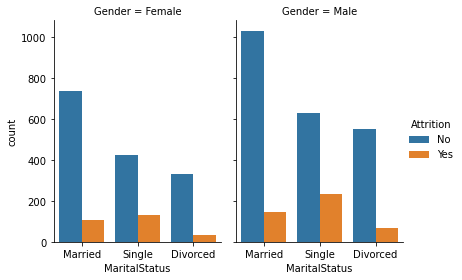

In [122]:
g4 = sns.catplot(x="MaritalStatus", hue="Attrition", col="Gender",
                data=full_data_clean, kind="count",
                height=4, aspect=.7);

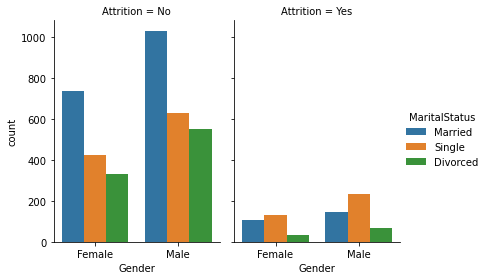

In [123]:
g5 = sns.catplot(x="Gender", hue="MaritalStatus", col="Attrition",
                data=full_data_clean, kind="count",
                height=4, aspect=.7);

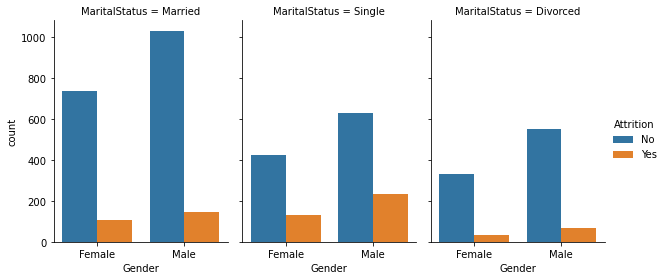

In [124]:
g6 = sns.catplot(x="Gender", hue="Attrition", col="MaritalStatus",
                data=full_data_clean, kind="count",
                height=4, aspect=.7);

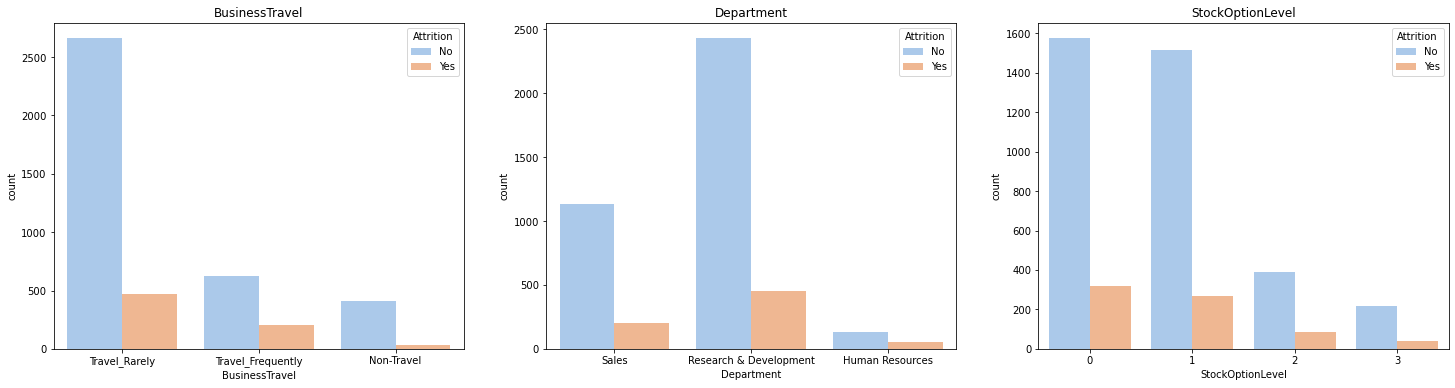

In [133]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.countplot(x='BusinessTravel', hue='Attrition', data=full_data_clean, palette='pastel');
plt.title('BusinessTravel')

plt.subplot(1,3,2)
sns.countplot(x='Department', hue='Attrition', data=full_data_clean, palette='pastel');
plt.title('Department')

plt.subplot(1,3,3)
sns.countplot(x='StockOptionLevel', hue='Attrition', data=full_data_clean, palette='pastel');
plt.title('StockOptionLevel')

plt.show()

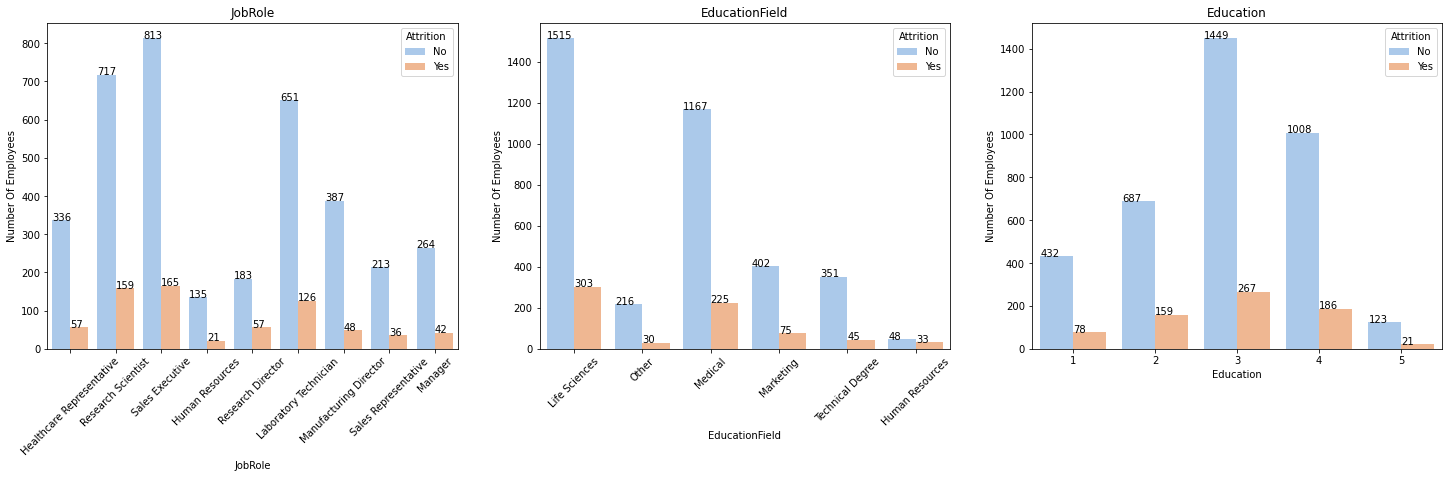

In [212]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
chart1 = sns.countplot(x='JobRole', hue='Attrition', data=full_data_clean, palette='pastel');
plt.title('JobRole')
plt.ylabel('Number Of Employees')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
for p in chart1.patches:
    chart1.annotate((p.get_height()),(p.get_x() , p.get_height()))

plt.subplot(1,3,2)
chart2 = sns.countplot(x='EducationField', hue='Attrition', data=full_data_clean, palette='pastel');
plt.title('EducationField')
plt.ylabel('Number Of Employees')
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
for p in chart2.patches:
    chart2.annotate((p.get_height()),(p.get_x() , p.get_height()))

plt.subplot(1,3,3)
ax = sns.countplot(x='Education', hue='Attrition', data=full_data_clean, palette='pastel');
plt.ylabel('Number Of Employees')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x() , p.get_height()))
plt.title('Education')

plt.show()

In [202]:
full_data_clean[full_data_clean['EducationField']=='Life Sciences']['Attrition'].value_counts()

No     1515
Yes    303 
Name: Attrition, dtype: int64

In [204]:
(full_data_clean['EducationField'] == 'Other').sum()

246

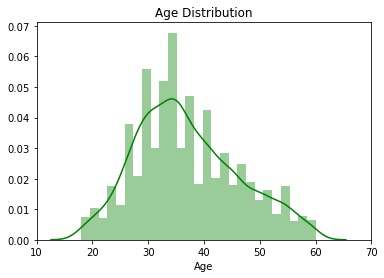

In [139]:
sns.distplot(full_data_clean['Age'], color='green')
plt.xlim(10,70)
plt.title('Age Distribution')
plt.show()

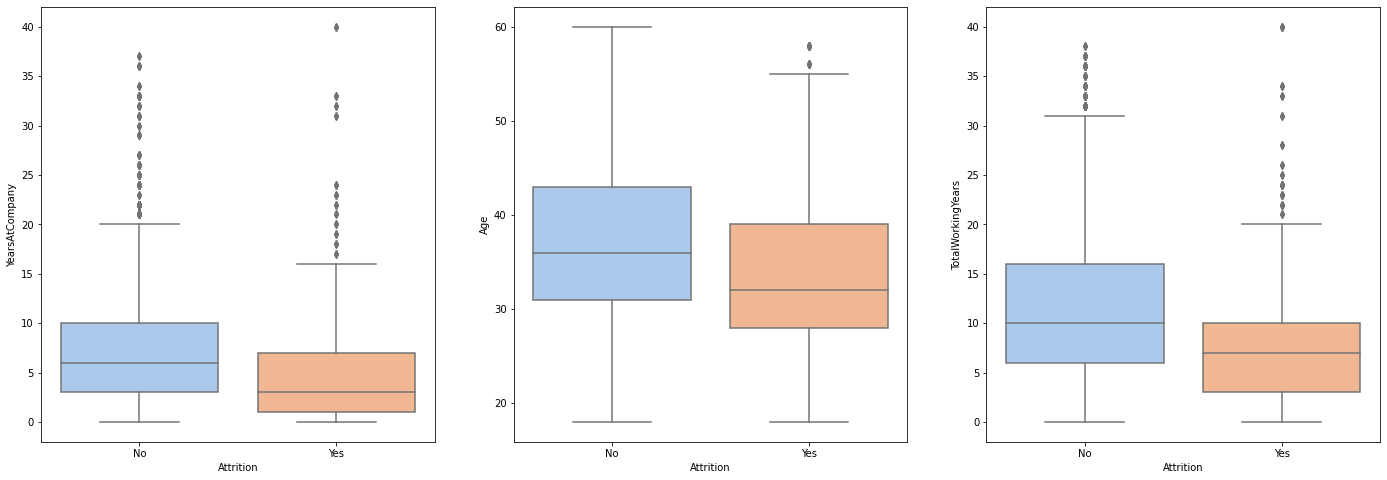

In [143]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
sns.boxplot(x='Attrition', y='YearsAtCompany', data=full_data_clean, palette='pastel');
plt.subplot(1,3,2)
sns.boxplot(x='Attrition', y='Age', data=full_data_clean, palette='pastel');
plt.subplot(1,3,3)
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=full_data_clean, palette='pastel');
plt.show()

In [155]:
def generation(row):
    if row['Age']<=24:
        row['Generation'] = 'Generation Z'
        return 'Generation Z'
    elif ((row['Age']>24)&(row['Age']<=37)):
        row['Generation'] ='Millenials'
        return 'Millenials'
    elif ((row['Age']>37)&(row['Age']<=54)):
        row['Generation'] ='Generation X'
        return 'Generation X'
    elif ((row['Age']>54)&(row['Age']<74)):
        row['Generation'] ='Baby Boomers'
        return 'Baby Boomers'
    else:
        row['Generation']='Silent Generation'
        return 'Silent Generation'
    
full_data_clean['Generation']=''


#Applying the function
full_data_clean['Generation']=full_data_clean.apply(generation,axis=1)

In [165]:
full_data_clean.head()

,EmployeeID,Gender,Age,MaritalStatus,DistanceFromHome,EducationField,Education,Department,JobLevel,JobRole,StandardHours,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,MonthlyIncome,PercentSalaryHike,BusinessTravel,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,PerformanceRating,StockOptionLevel,EmployeeCount,Over18,Attrition,Generation
0,1,Female,51,Married,6,Life Sciences,2,Sales,1,Healthcare Representative,8,1,1,1,131160,11,Travel_Rarely,6,0,0,3,3,4,2,3,0,1,Y,No,Generation X
1,2,Female,31,Single,10,Life Sciences,1,Research & Development,1,Research Scientist,8,5,6,0,41890,23,Travel_Frequently,3,1,4,2,3,2,4,4,1,1,Y,Yes,Millenials
2,3,Male,32,Married,17,Other,4,Research & Development,4,Sales Executive,8,5,5,1,193280,15,Travel_Frequently,2,0,3,3,2,2,1,3,3,1,Y,No,Millenials
3,4,Male,38,Married,2,Life Sciences,5,Research & Development,3,Human Resources,8,8,13,3,83210,11,Non-Travel,5,7,5,2,4,4,3,3,3,1,Y,No,Generation X
4,5,Male,32,Single,10,Medical,1,Research & Development,1,Sales Executive,8,6,9,4,23420,12,Travel_Rarely,2,0,4,3,4,1,3,3,2,1,Y,No,Millenials


In [164]:
full_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
Age                        4410 non-null int64
MaritalStatus              4410 non-null object
DistanceFromHome           4410 non-null int64
EducationField             4410 non-null object
Education                  4410 non-null int64
Department                 4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
StandardHours              4410 non-null int64
YearsAtCompany             4410 non-null int64
TotalWorkingYears          4410 non-null int64
NumCompaniesWorked         4410 non-null int64
MonthlyIncome              4410 non-null int64
PercentSalaryHike          4410 non-null int64
BusinessTravel             4410 non-null object
TrainingTimesLastYear      4410 non-null int64
YearsSinceLastPromotion    4410 non-null 

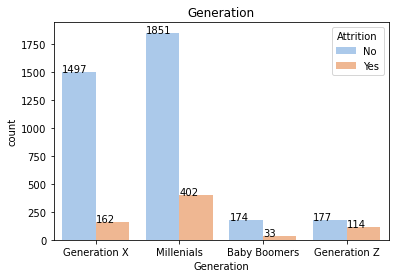

In [227]:
gen_chart = sns.countplot(x='Generation', hue='Attrition', data=full_data_clean, palette='pastel');
plt.title('Generation')
for p in gen_chart.patches:
    gen_chart.annotate((p.get_height()),(p.get_x() , p.get_height()))
plt.show()

In [167]:
full_data_clean['Generation'].value_counts()

Millenials      2253
Generation X    1659
Generation Z    291 
Baby Boomers    207 
Name: Generation, dtype: int64

In [169]:
full_data_clean['Generation'].value_counts().sum()

4410

In [178]:
full_data_clean[(full_data_clean['Age']>=45) & (full_data_clean['Age']<=60)]

# ((row['Age']>37)&(row['Age']<=54))

,EmployeeID,Gender,Age,MaritalStatus,DistanceFromHome,EducationField,Education,Department,JobLevel,JobRole,StandardHours,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,MonthlyIncome,PercentSalaryHike,BusinessTravel,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,PerformanceRating,StockOptionLevel,EmployeeCount,Over18,Attrition,Generation
0,1,Female,51,Married,6,Life Sciences,2,Sales,1,Healthcare Representative,8,1,1,1,131160,11,Travel_Rarely,6,0,0,3,3,4,2,3,0,1,Y,No,Generation X
5,6,Female,46,Married,8,Life Sciences,3,Research & Development,4,Research Director,8,7,28,3,40710,13,Travel_Rarely,5,7,7,3,3,2,2,3,0,1,Y,No,Generation X
10,11,Male,45,Married,17,Medical,2,Research & Development,2,Laboratory Technician,8,20,21,0,79910,13,Travel_Rarely,2,4,10,2,3,4,3,3,2,1,Y,No,Generation X
12,13,Female,55,Single,14,Life Sciences,4,Research & Development,1,Sales Executive,8,36,37,0,55380,17,Travel_Rarely,2,4,13,3,4,1,3,3,0,1,Y,No,Baby Boomers
13,14,Male,47,Married,1,Medical,1,Research & Development,1,Research Scientist,8,10,10,1,57620,11,Non-Travel,4,9,9,2,1,2,2,3,2,1,Y,Yes,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384,4385,Male,59,Married,4,Technical Degree,4,Research & Development,1,Healthcare Representative,8,2,7,8,27600,11,Travel_Rarely,3,2,2,4,2,3,2,3,0,1,Y,No,Baby Boomers
4385,4386,Male,50,Divorced,11,Life Sciences,2,Research & Development,2,Sales Executive,8,7,32,3,62940,23,Travel_Rarely,2,0,6,4,4,4,2,4,1,1,Y,No,Generation X
4389,4390,Male,52,Single,2,Technical Degree,3,Research & Development,1,Sales Executive,8,33,33,1,45070,14,Non-Travel,3,15,12,2,1,3,4,3,0,1,Y,No,Generation X
4396,4397,Female,45,Married,18,Life Sciences,1,Research & Development,2,Sales Representative,8,24,25,0,58110,14,Travel_Rarely,4,1,7,2,3,4,3,3,0,1,Y,No,Generation X


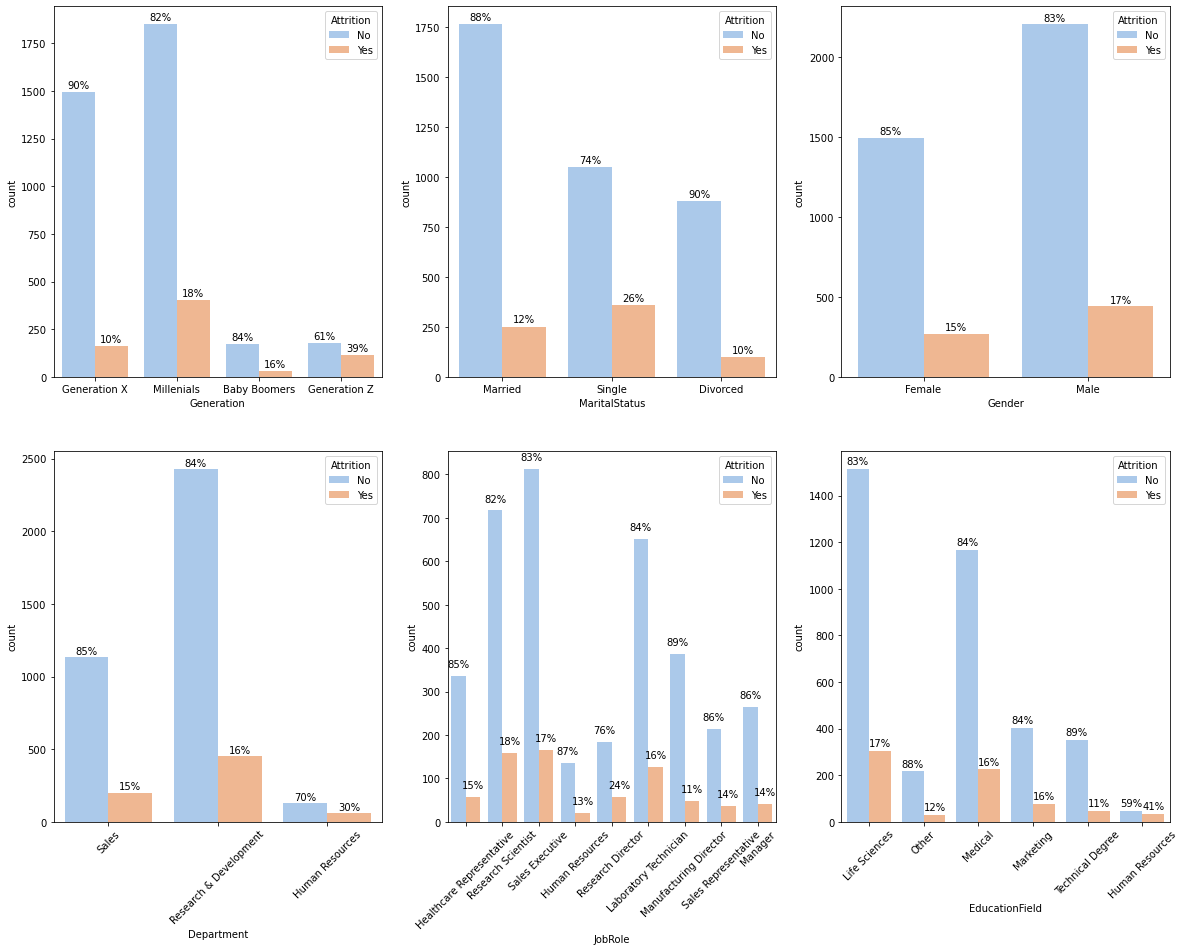

In [218]:
graphs = ['Generation', 'MaritalStatus', 'Gender', 'Department', 'JobRole', 'EducationField']
plt.figure(figsize=(20,15))
for index, item in enumerate(graphs):
    plt.subplot(2,3,index+1)
    ax = sns.countplot(x=item, hue='Attrition', data=full_data_clean, palette='pastel')
    if index +1>3 : #for index 4,5,6 
        plt.xticks(rotation=45) 
    index = int(len(ax.patches)/2)
    for left,right in zip(ax.patches[:index], ax.patches[index:]):
        left_height = left.get_height()
        right_height = right.get_height()
        total = left_height + right_height
        ax.text(left.get_x() + left.get_width()/2., left_height + 20, '{:.0%}'.format(left_height/total), ha="center")# left annotation
        ax.text(right.get_x() + right.get_width()/2., right_height + 20, '{:.0%}'.format(right_height/total), ha="center") #right annotation
plt.show()  

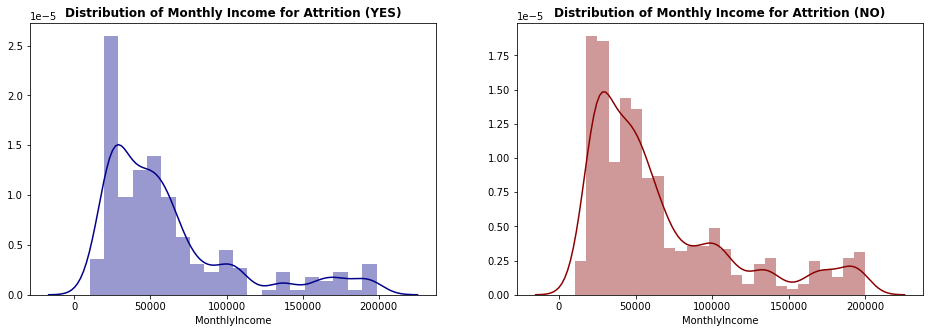

In [186]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(full_data_clean[full_data_clean['Attrition']=='Yes']['MonthlyIncome'], color='darkblue')
plt.title('Distribution of Monthly Income for Attrition (YES)', fontsize=12, fontweight='bold')

plt.subplot(1,2,2)
sns.distplot(full_data_clean[full_data_clean['Attrition']=='No']['MonthlyIncome'], color='darkred')
plt.title('Distribution of Monthly Income for Attrition (NO)', fontsize=12, fontweight='bold')

plt.show()

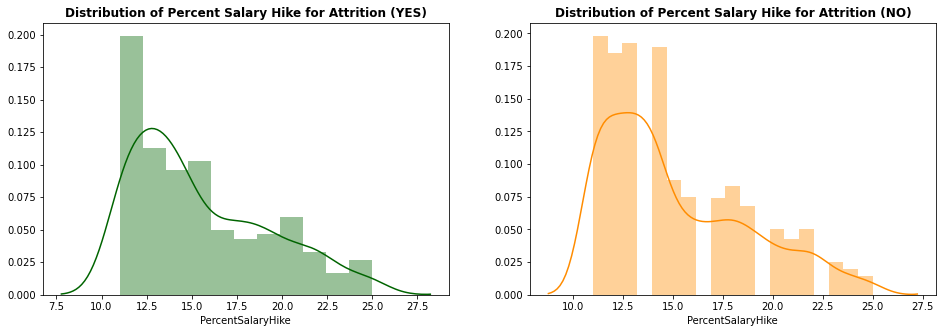

In [187]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(full_data_clean[full_data_clean['Attrition']=='Yes']['PercentSalaryHike'], color='darkgreen')
plt.title('Distribution of Percent Salary Hike for Attrition (YES)', fontsize=12, fontweight='bold')

plt.subplot(1,2,2)
sns.distplot(full_data_clean[full_data_clean['Attrition']=='No']['PercentSalaryHike'], color='darkorange')
plt.title('Distribution of Percent Salary Hike for Attrition (NO)', fontsize=12, fontweight='bold')

plt.show()

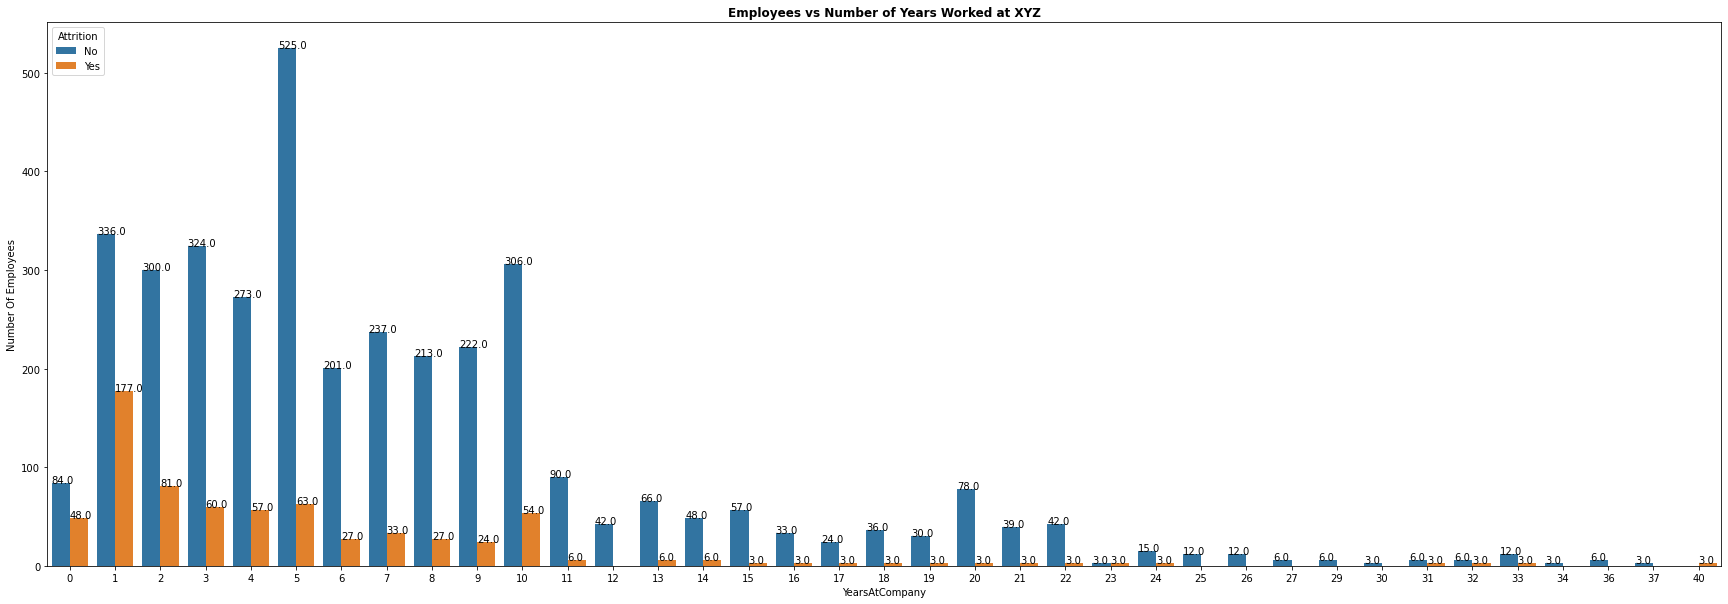

In [238]:
#plotting the attrition accross employees varying with the number of years they have served at the company
plt.figure(figsize=[30,10])
g = sns.countplot(x="YearsAtCompany",hue='Attrition',data=full_data_clean)
plt.ylabel('Number Of Employees')
plt.title('Employees vs Number of Years Worked at XYZ',fontweight='bold')
for p in g.patches:
    g.annotate((p.get_height()),(p.get_x() , p.get_height()))

In [248]:
full_data_clean['YearsAtCompany'].value_counts()

5     588
1     513
3     384
2     381
10    360
4     330
7     270
9     246
8     240
6     228
0     132
11    96 
20    81 
13    72 
15    60 
14    54 
22    45 
12    42 
21    42 
18    39 
16    36 
19    33 
17    27 
24    18 
33    15 
25    12 
26    12 
32    9  
31    9  
29    6  
36    6  
27    6  
23    6  
40    3  
37    3  
30    3  
34    3  
Name: YearsAtCompany, dtype: int64

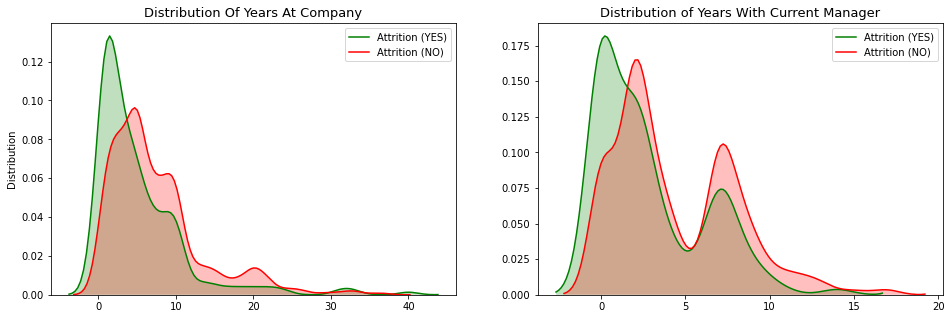

In [191]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.kdeplot(full_data_clean['YearsAtCompany'][full_data_clean.Attrition=='Yes'], shade=True, color='green')
sns.kdeplot(full_data_clean['YearsAtCompany'][full_data_clean.Attrition=='No'], shade=True, color='red')
plt.title('Distribution Of Years At Company', fontsize=13)
plt.ylabel('Distribution')
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.subplot(1,2,2)
sns.kdeplot(full_data_clean['YearsWithCurrManager'][full_data_clean.Attrition=='Yes'], shade=True, color='green')
sns.kdeplot(full_data_clean['YearsWithCurrManager'][full_data_clean.Attrition=='No'], shade=True, color='red')
plt.title('Distribution of Years With Current Manager', fontsize=13)
plt.legend(['Attrition (YES)','Attrition (NO)'])


plt.show()

If employees spend more time in the company, attrition rate is lower. People don't want to leave the company after spending long time in the same company.

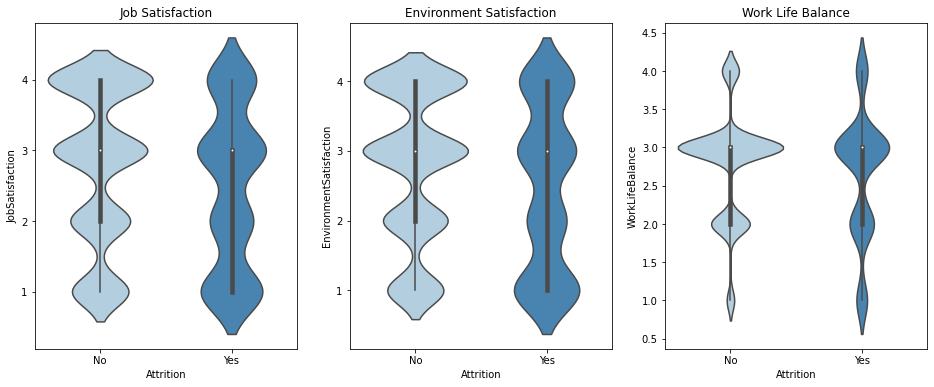

In [192]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.violinplot(data=full_data_clean, x='Attrition', y='JobSatisfaction', palette='Blues')
plt.title('Job Satisfaction')

plt.subplot(1,3,2)
sns.violinplot(data=full_data_clean, x='Attrition', y='EnvironmentSatisfaction', palette='Blues')
plt.title('Environment Satisfaction')

plt.subplot(1,3,3)
sns.violinplot(data=full_data_clean, x='Attrition', y='WorkLifeBalance', palette='Blues')
plt.title('Work Life Balance')

plt.show()

0       2
1       4
2       1
3       3
4       3
       ..
4405    3
4406    3
4407    3
4408    3
4409    3
Name: WorkLifeBalance, Length: 4410, dtype: int64